In [124]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from scipy.stats import entropy

In [291]:
def kl(p, q):
    """Kullback-Leibler divergence D(P || Q) for discrete distributions
    Parameters
    ----------
    p, q : array-like, dtype=float, shape=n
    Discrete probability distributions.
    """
    p = np.asarray(p, dtype=float)
    q = np.asarray(q, dtype=float)

    return np.sum(np.where(p != 0, p * np.log(p / q), 0))

In [297]:
# Load FES
# df = pd.read_csv("FES_hel_colvar", delim_whitespace=True)
# df = pd.read_csv("FES_hel_colvar", delim_whitespace=True)
df = pd.read_csv("FES_e2e_colvar", delim_whitespace=True)


In [298]:
time_list = df['time'].unique()
cvs = [ x for x in df.columns.values.tolist() if x not in ['time', 'fes']]

In [299]:
total_kldiv, total_kldiv_smooth = [], []
for index, time in enumerate(time_list):
    current = df[df['time'] == time]
    reference = df[df['time'] == 500000.0]

    cur_fe = current['fes'].values
    ref_fe = reference['fes'].values

    # Porbabilities
    unitfactor = 2.577483

    ref = np.exp(-ref_fe / unitfactor)
    cur = np.exp(-cur_fe / unitfactor)
    diff = (cur_fe - ref_fe) / unitfactor

    # Normalized probabilities
    ref_norm = ref / np.sum(ref)
    cur_norm = cur / np.sum(cur)

    # To adjust for large arear where q = 0, a Bayesian smoothing function is employed. Here a "simulation" is performed of N ideal steps, using the FE from sampling.
    # The new adjusted probability for each of the bins is then (1 + Pi * N) / (M + N), where M is the total number of bins.
    # N is chosen to be big enough to turn 0 values into very small values, without risking python not being able to handle the values.
    N, M= 1e9, len(ref_norm) 
    ref_norm_smooth = (N * ref_norm + 1) / (N + M)
    cur_norm_smooth = (N * cur_norm + 1) / (N + M)

    # Calculate KLdiv
    total_kldiv.append(kl(ref_norm, cur_norm))
    total_kldiv_smooth.append(kl(ref_norm_smooth, cur_norm_smooth))

(0.0, 20.0)

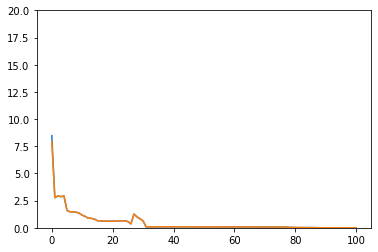

In [300]:
kldiv = np.asarray(total_kldiv)
kldiv_smooth = np.asarray(total_kldiv_smooth)

fig, ax = plt.subplots()
ax.plot(kldiv)
ax.plot(kldiv_smooth)
plt.ylim([0, 20])
